# Analiza wagi


Created: 2021

Modified: 2024.11.13

### Importy

In [107]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

### Zmienne globalne, flagi

In [137]:
PRINT = False

### Formatowanie wyswietlania

In [108]:
#pd.options.display('precision', 2)
#df.style.format('{:.1f}')
#df.style.format({'A': '{:.16f}', 'D': '{:.5f}'})

pd.options.display.float_format = "{:,.2f}".format

### Wczytani pliku z danymi

In [109]:
#pth = '/home/marek/Dropbox/priv/codzienne/waga.ods'
pth = '20241113_waga.xlsx'
#dfs = pd.read_excel(pth, sheet_name='2021', engine='openpyxl')

In [111]:
df = pd.read_excel(pth, sheet_name=year_list, index_col=0)

#### Generowanie etykiet z latami

In [110]:
year_list = [str(y) for y in range(2017,2025)]
year_list.sort(reverse=True)
print(f"List of yeares:\n\t{year_list}")

List of yeares:
	['2024', '2023', '2022', '2021', '2020', '2019', '2018', '2017']


### Wydzielenie poszczególnych formularzy

In [112]:
df24 = df['2024']
df23 = df['2023']
df22 = df['2022']
df21 = df['2021']
df20 = df['2020']
df19 = df['2019']
df18 = df['2018']
df17 = df['2017']

#### Wyswietlanie

In [138]:
if PRINT: df24.head()

### Ograniczenie wczytanych danych do danych wlasciwych

In [114]:
df24 = df24.iloc[:31,:12]
df23 = df22.iloc[:31,:12]
df22 = df23.iloc[:31,:12]
df21 = df21.iloc[:31,:12]
df20 = df20.iloc[:31,:12]
df19 = df19.iloc[:31,:12]
df18 = df18.iloc[:31,:12]
df17 = df17.iloc[:31,:12]

### Kolumna Rok

In [116]:
df24.insert(0,'rok', 2024)
df23.insert(0,'rok', 2023)
df22.insert(0,'rok', 2022)
df21.insert(0,'rok', 2021)
df20.insert(0,'rok', 2020)
df19.insert(0,'rok', 2019)
df18.insert(0,'rok', 2018)
df17.insert(0,'rok', 2017)

### Polaczenie tabel w jedna duza tabele

In [140]:
df = pd.concat([df24, df23, df22, df21, df20, df19, df18, df17], axis=0)

#### PRINT

In [141]:
if PRINT:
    print(df.shape)
    df.head(2)

### Zamiana przecinkow na kropki

In [118]:
# Zamiana przecinka na kropke
df = df.replace(',', '.', regex=True)

### Zamiana danych typu ```object``` na dane ```float``` 

In [119]:
# Dla wszystkich kolumn, które powinny być numeryczne
df = df.apply(pd.to_numeric, errors='coerce')

#### Pomocnicze

In [120]:
dfs = [df24, df23, df22, df21, df20, df19, df18, df17]

### Zmiana nazw kolumn na rok i miesiace

In [153]:
cols = ['rok','styczen', 'luty', 'marzec', 'kwiecien', 'maj', 'czerwiec',
        'lipiec', 'sierpien', 'wrzesien', 'pazdziernik', 'listopad', 'grudzien']
df.cols = cols

#### Print

In [154]:
if PRINT:
    print(df.shape)
    df.head(2)

---

## Zapis do pliu ```CSV````

In [155]:
df.to_csv("waga-2017-2024.csv", header=True)

---

### Grupownie po latach

In [123]:
df_grouped = df.groupby('rok').mean()
#mn.replace(0, np.NaN, inplace=True)
df_grouped.head(9)

,styczen,luty,marzec,kwiecien,maj,czerwiec,lipiec,sierpien,wrzesien,pazdziernik,listopad,grudzien
rok,,,,,,,,,,,,
2017,0.00,NaN,NaN,NaN,84.84,84.40,83.61,82.73,80.93,79.69,80.06,81.84
2018,82.76,83.11,84.00,84.36,84.95,84.46,83.78,82.98,82.45,80.90,80.35,78.79
2019,77.37,75.98,75.24,74.83,73.60,72.13,70.58,70.64,70.41,69.67,67.73,67.77
2020,67.92,67.57,67.77,66.93,67.33,68.32,68.77,68.59,69.04,69.29,69.77,70.27
2021,71.17,71.34,71.43,72.10,71.40,70.56,69.77,68.57,68.98,70.16,70.99,72.13
2022,72.55,73.25,74.50,74.97,74.60,73.66,74.54,74.89,75.14,74.35,72.08,72.43
2023,72.55,73.25,74.50,74.97,74.60,73.66,74.54,74.89,75.14,74.35,72.08,72.43
2024,73.19,72.50,71.91,72.33,71.92,74.00,73.51,73.21,74.59,74.17,73.62,0.00


In [124]:
df_grouped.count()

styczen        8
luty           7
marzec         7
kwiecien       7
maj            8
czerwiec       8
lipiec         8
sierpien       8
wrzesien       8
pazdziernik    8
listopad       8
grudzien       8
dtype: int64

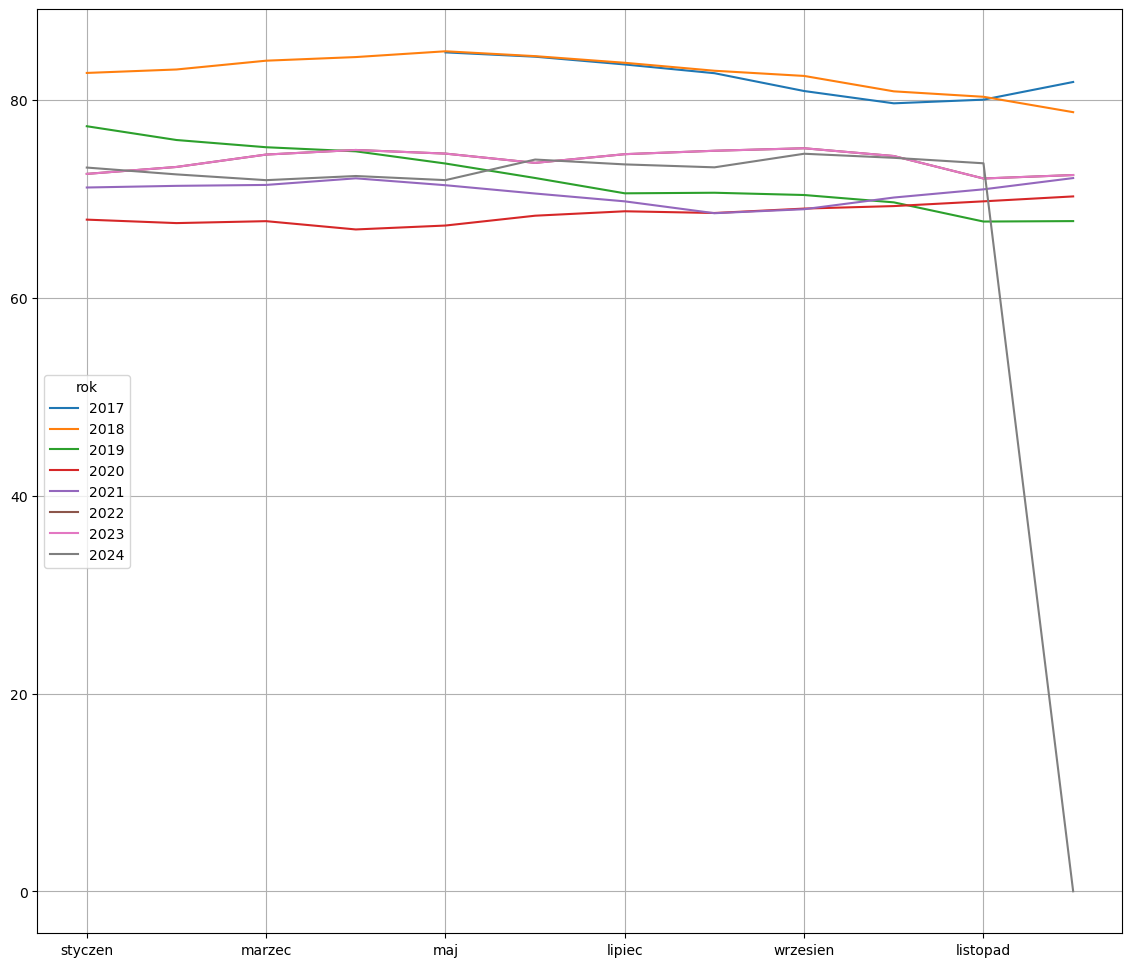

In [126]:
fig,ax = plt.subplots(figsize=(14,12))
df_grouped.T.plot.line(ax=ax)
ax.grid()

In [14]:
df.mean().round(1)

rok        2,019.00
styczen       74.30
luty          74.40
marzec        74.60
kwiecien      74.90
maj           75.60
czerwiec      76.60
lipiec        74.50
sierpien      75.20
wrzesien      74.70
listopad      73.90
grudzien      73.90
dtype: float64

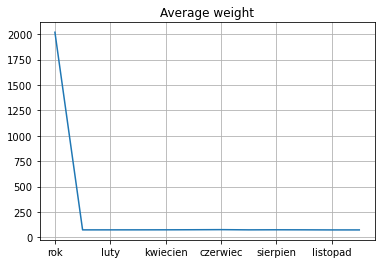

In [15]:
p = df.mean().plot()
p.grid(True)
tit = p.set_title('Average weight')

<AxesSubplot:>

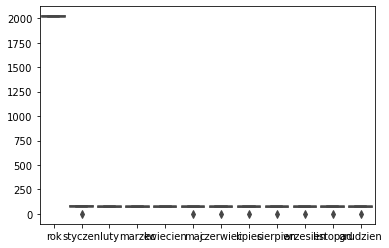

In [18]:
sns.boxplot(data=df)

In [163]:
%matplotlib qt

In [161]:
matplotlib inline